Importing the Library

In [24]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from multiprocessing import Pool

from Helper_Code import *

Uploading the Datasets

In [25]:
# Uploading the DataSet
DataFrames = UploadDataSet(base_directory="dataframes_list.pkl.gz")

loaded_df = UploadDataSet(base_directory="MS_u_w_uw.pkl.gz")

# Time Series of the u_fluc for all points
u_fluc_allpoints = UploadDataSet(base_directory="ufluc_TS_Allpoints_Full.pkl.gz")

# Time Series of the w_fluc for all points
w_fluc_allpoints = UploadDataSet(base_directory="wfluc_TS_Allpoints_Full.pkl.gz")

In [36]:
DataFrames[0]["V"]-DataFrames[800]["Vmean"]

0        0.034541
1       -0.020072
2       -0.050661
3       -0.087106
4       -0.098783
           ...   
17995    0.090286
17996    0.178855
17997    0.251438
17998    0.198364
17999    0.200534
Length: 18000, dtype: float64

In [37]:
DataFrames[0]

,X,Y,U,V,Ux,Uy,Vx,Vy,vor,Umean,Vmean,Urms,Vrms,ufluc,wfluc,V16,V17
0,0.314097,33.0326,3.46271,0.064536,-47.48990,99.7924,-74.9919,-44.9309,-174.7840,0.0,0.0,0.0,0.0,-0.269271,0.034541,450.314,0.558501
1,0.942293,33.0326,3.48953,0.013280,15.09410,60.6287,-92.4775,-18.0366,-153.1060,0.0,0.0,0.0,0.0,-0.255965,-0.020072,450.942,0.562828
2,1.535590,33.0326,3.50999,-0.018973,-27.05100,130.7770,-73.8357,21.3053,-204.6120,0.0,0.0,0.0,0.0,-0.238435,-0.050661,451.536,0.566128
3,2.128890,33.0326,3.50074,-0.057691,-7.20450,210.1000,-27.1359,56.5126,-237.2360,0.0,0.0,0.0,0.0,-0.245486,-0.087106,452.129,0.564635
4,2.722180,33.0326,3.45467,-0.068517,-4.44727,213.8220,18.4878,47.1953,-195.3340,0.0,0.0,0.0,0.0,-0.291523,-0.098783,452.722,0.557205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,86.549700,-32.9978,3.12049,0.117108,211.47100,214.5260,148.8580,194.3390,-65.6682,0.0,0.0,0.0,0.0,-0.166139,0.090287,536.550,0.503305
17996,87.142900,-32.9978,3.19540,0.200734,-59.11520,430.0830,62.3087,280.0960,-367.7750,0.0,0.0,0.0,0.0,-0.073013,0.178854,537.143,0.515388
17997,87.736100,-32.9978,3.02203,0.270963,-15.18650,770.1350,59.6885,331.3610,-710.4470,0.0,0.0,0.0,0.0,-0.241682,0.251439,537.736,0.487425
17998,88.329300,-32.9978,2.81474,0.214140,-6.64627,1037.3900,-37.8643,473.3800,-1075.2500,0.0,0.0,0.0,0.0,-0.439731,0.198363,538.329,0.453990


In [38]:
DataFrames[800]

,X,Y,U,V,Ux,Uy,Vx,Vy,vor,Umean,Vmean,Urms,Vrms,ufluc,wfluc,V16,V17
0,0.314097,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.73198,0.029995,0.537474,0.151676,-3.73198,-0.029995,450.314,0.0
1,0.942293,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74550,0.033352,0.531254,0.148314,-3.74550,-0.033352,450.942,0.0
2,1.535590,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74843,0.031688,0.532074,0.148811,-3.74843,-0.031688,451.536,0.0
3,2.128890,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74622,0.029415,0.536284,0.157544,-3.74622,-0.029415,452.129,0.0
4,2.722180,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74620,0.030266,0.540452,0.162781,-3.74620,-0.030266,452.722,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,86.549700,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.28663,0.026822,0.654904,0.219418,-3.28663,-0.026822,536.550,0.0
17996,87.142900,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.26842,0.021879,0.646911,0.216320,-3.26842,-0.021879,537.143,0.0
17997,87.736100,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.26372,0.019525,0.647714,0.217231,-3.26372,-0.019525,537.736,0.0
17998,88.329300,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25447,0.015776,0.650972,0.218226,-3.25447,-0.015776,538.329,0.0


Extracting the Locations (X,Y)

In [26]:
X, Y = IndexToLocation(DataFrames, np.arange(18000))
X = X.values.reshape(150, 120)
Y = Y.values.reshape(150, 120)

Selecting a Particular Location (as per your wish)

In [27]:
index = 54 #np.random.randint(100)
df = loaded_df[index]
df[:65]

,MS_u,MS_w,MS_uw
0,0.322932,0.025799,-0.003233
1,0.339466,0.026950,-0.003403
2,0.361628,0.028095,-0.003601
3,0.381566,0.028949,-0.003927
4,0.409665,0.030259,-0.004250
...,...,...,...
60,NaN,NaN,NaN
61,NaN,NaN,NaN
62,NaN,NaN,NaN
63,NaN,NaN,NaN


Selecting a Reference Velocity : Required to define the Critical velocity

In [28]:
# A reference Velocity
U_ref = (DataFrames[800]["Umean"].max() + DataFrames[800]["Umean"].min())/2
U_ref = U_ref.round(5)
print(U_ref)

3.33976


Plotting the Time Series of u_fluc for the above selected point

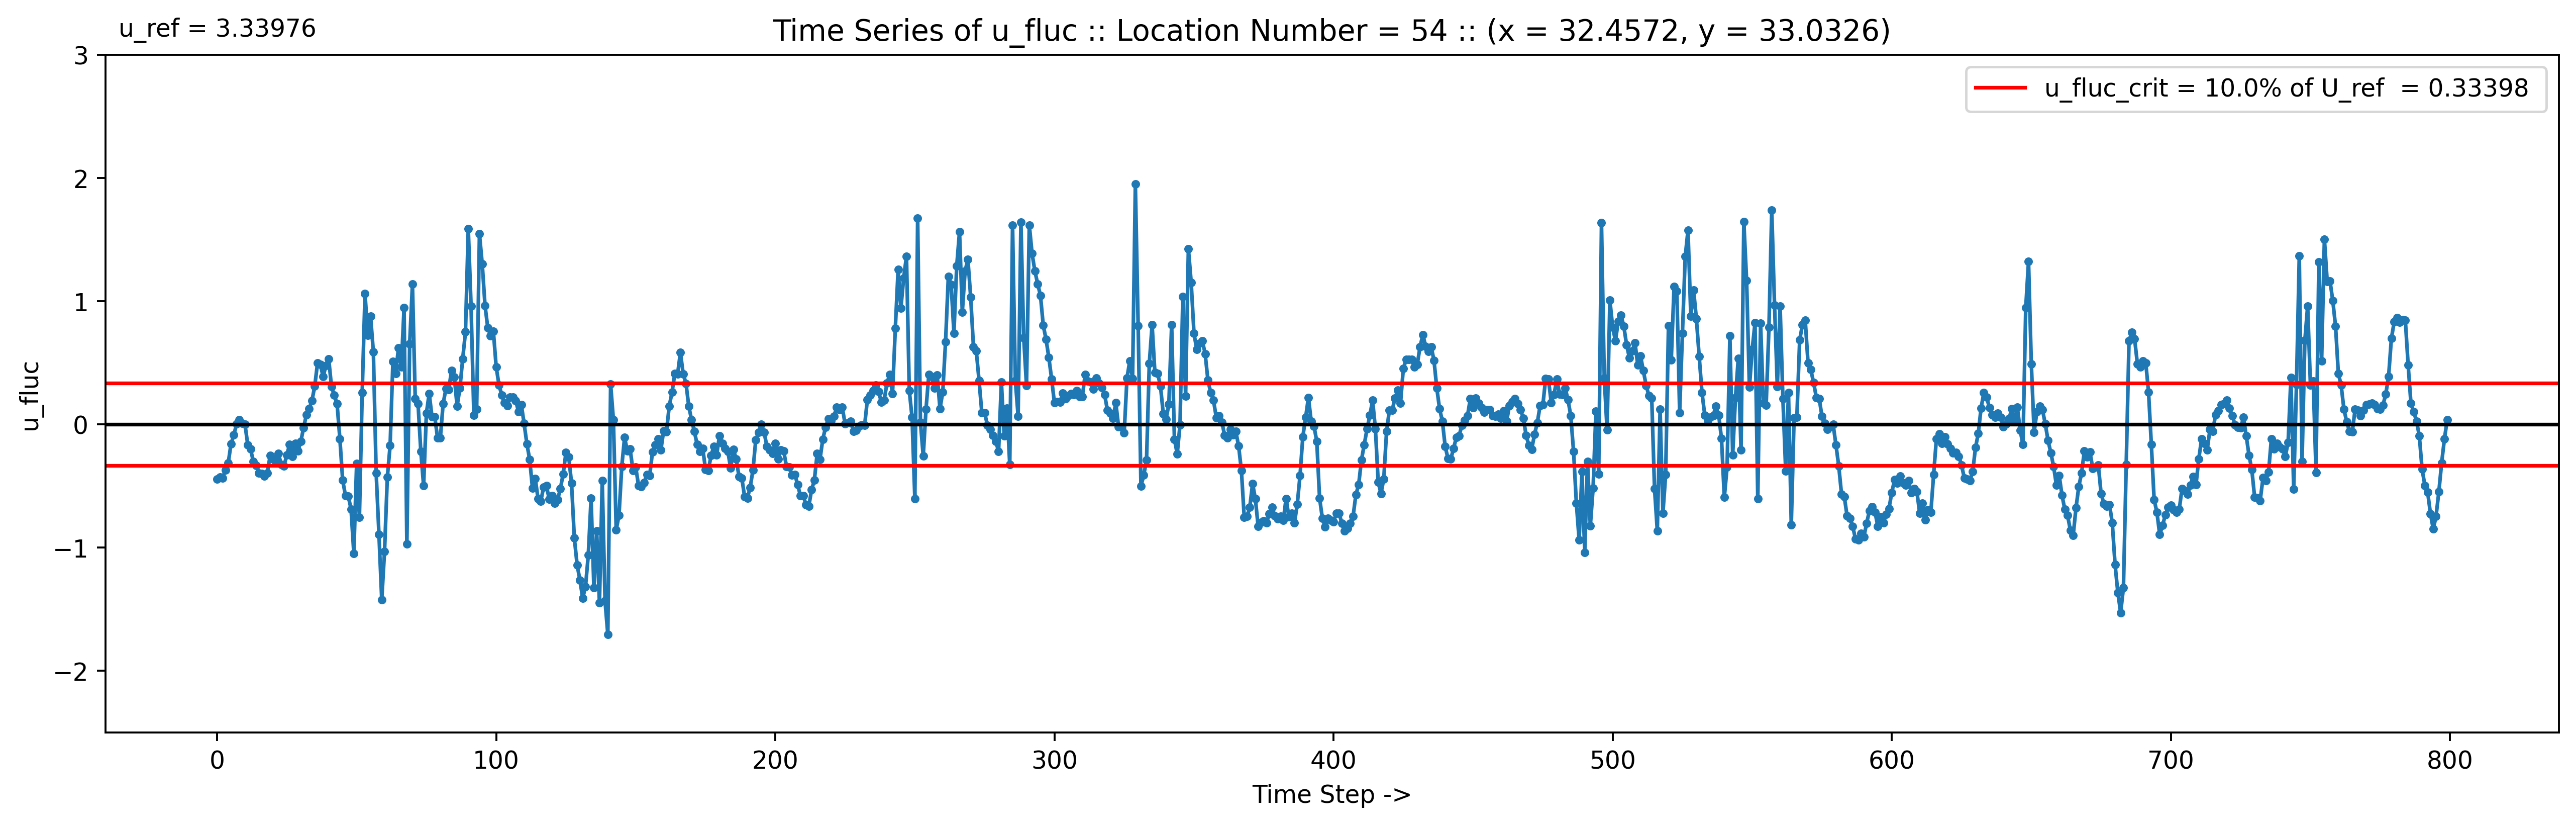

In [29]:
VarName = "u_fluc"

TS_var1 = u_fluc_allpoints[f"ufluc_{index}"]
TS_var2 = w_fluc_allpoints[f"wfluc_{index}"]

pts = IndexToLocation(DataFrames, index)

alpha = 0.1
u_critical = (alpha * U_ref).round(5)

# Plot of the Time Series
plt.plot(TS_var1, marker='.', markersize=5, linestyle='-')

plt.axhline(y= 0, color = 'k')
plt.axhline(y= u_critical, color = 'r')
plt.axhline(y=-u_critical, color = 'r', label = f'u_fluc_crit = {alpha*100}% of U_ref  = {u_critical} ')

plt.gcf().set_size_inches(18, 5) 
plt.gcf().set_dpi(350)  # Set DPI for high quality


plt.title(f"Time Series of {VarName} :: Location Number = {index} :: (x = {pts[0]}, y = {pts[1]})")
plt.ylabel(f"{VarName}")
plt.xlabel("Time Step ->")
plt.legend()

plt.ylim(-2.5, 3)

plt.text(0.1, 3.15, f'u_ref = {U_ref}', ha='center')

plt.show()

Ploting the Computed Results

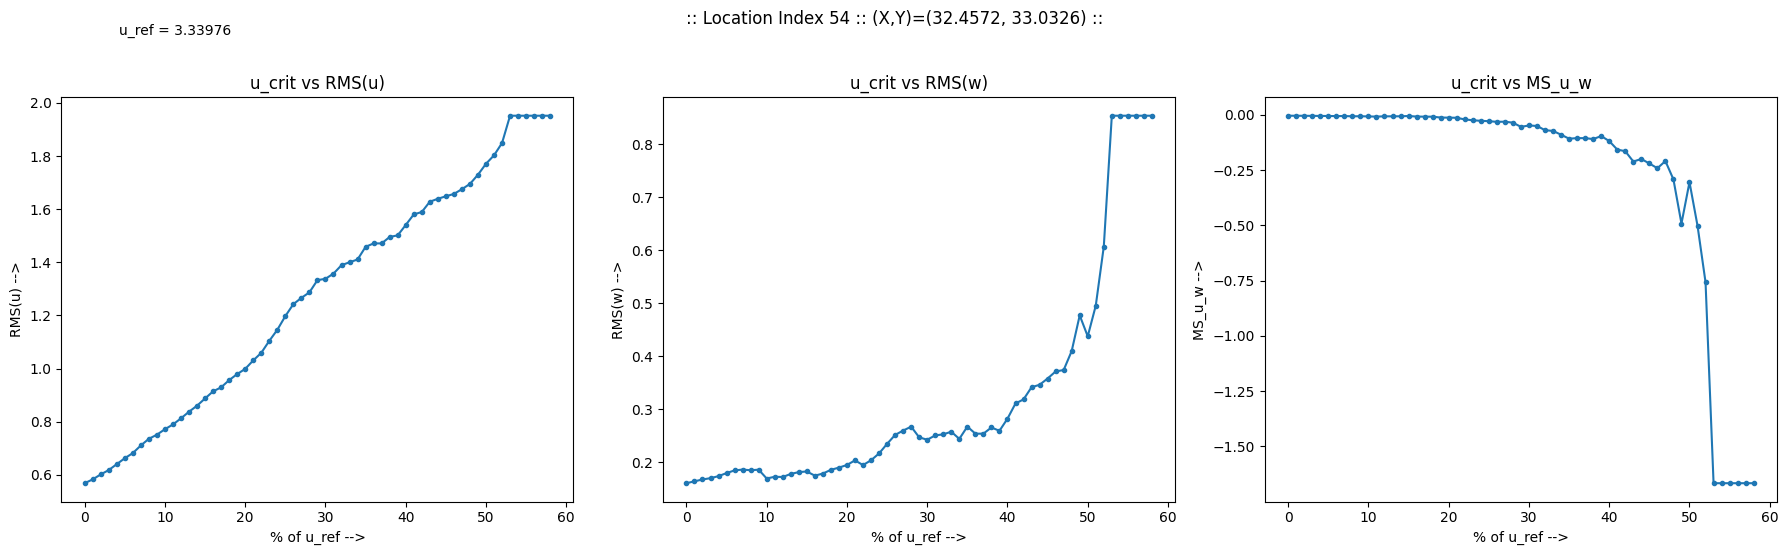

In [30]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot RMS(u) vs. u_crit
axes[0].plot(np.arange(0, 1.01, 0.01)*100, df["MS_u"] ** 0.5, marker='.')
axes[0].set_xlabel("% of u_ref -->")
axes[0].set_ylabel("RMS(u) -->")
axes[0].set_title(f"u_crit vs RMS(u)")

# Plot RMS(w) vs. u_crit
axes[1].plot(np.arange(0, 1.01, 0.01)*100, df["MS_w"] ** 0.5, marker='.')
axes[1].set_xlabel("% of u_ref -->")
axes[1].set_ylabel("RMS(w) -->")
axes[1].set_title(f"u_crit vs RMS(w)")

# Plot MS_u_w vs. u_crit
axes[2].plot(np.arange(0, 1.01, 0.01)*100, df["MS_uw"], marker='.')
axes[2].set_xlabel("% of u_ref -->")
axes[2].set_ylabel("MS_u_w -->")
axes[2].set_title(f"u_crit vs MS_u_w")

# Adjust layout
plt.tight_layout()

# Add a common title
fig.suptitle(f':: Location Index {index} :: (X,Y)={IndexToLocation(DataFrames, index)} ::', y= 1.1)

# Add a comment common to all plots
fig.text(0.1, 1.05, f'u_ref = {U_ref}', ha='center')

# Show the plot
plt.show()